# Linear and Polynomial Regressions
By Sai Prajwal Kotamraju



First step is to import the required libraries- NumPy (For mathematical manipulations) and MatPlotLib for plotting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

If the relation between independent and dependent variables is linear, i.e. if the dependent variable can be expressed closely as sum of weighted inputs (independent variables), Linear Regression is preferred. 
Let us look into a simple example.

In [2]:
X = 2* np.random.rand(100,1) # A vector of 100 random values between 0 and 2
y = 3* X + 5 + np.random.randn(100,1) # Closely linear relationship betweehn DV and IV with some Gaussian noise

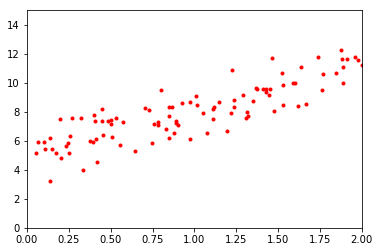

In [3]:
plt.plot(X,y,"r.") 
plt.axis([0, 2, 0, 15])
plt.show()

As we can see from the plot above, the values of y are increasing almost linearly with the X values. So, we can use Linear Regression to predict the dependent variable value for a new independent variable value.

Now, let us use Scikit-Learn to find the model parameters (In this case, slope and intercept values).

Note: For a model with N independent features, we will have N+1 model parameters --> N weights for N individual features plus one parameter for the intercept.

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let us now see the values of intercept and the slope

In [5]:
lin_reg.intercept_ , lin_reg.coef_

(array([ 5.08388075]), array([[ 3.00071297]]))

As we can see, the slope obtained is very close to the defined slope = 3. And the intercept value by our model is also close to our defined intercept 5. (Since y = 3*X+5+noise). 

Now, let us see how our model predicts the values.

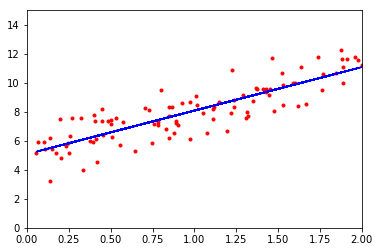

In [6]:
y_pred = lin_reg.predict(X)
plt.plot(X,y,'r.')
plt.plot(X,y_pred,'b-')
plt.axis([0, 2, 0, 15])
plt.show()

The blue line in the above plot corresponds to the predicted values of our linear regression model with respect to the independent variable (feature) X. 

To predict the value for a new instance of feature X, all we need to do is this. (See below).

In [7]:
X_new = np.array([[0],[1],[2],[2.25],[2.6],[3]]) #Feature instances for which we want the predictions
y_pred_new = lin_reg.predict(X_new)
y_pred_new

array([[  5.08388075],
       [  8.08459373],
       [ 11.0853067 ],
       [ 11.83548494],
       [ 12.88573448],
       [ 14.08601967]])

This concludes the basics of a Linear Regression Model.

# Finding out the model parameters using Gradient Descent algorithm

Batch Gradient Descent: Involves calculations over the complete training set X at each step

In [8]:
X_app = np.c_[np.ones((100,1)),X] # Adding a column of ones to the X matrix on to the left.

lr = 0.1 # Learning Rate 
N = 1000 # Number of steps or iterations
m = 100 # Number of instances

params = np.random.randn(2,1) # Random initialization of parameters (slope and intercept)

for i in range(N):
    gradient = (2.00/m)*(X_app.T).dot(X_app.dot(params) - y) # Formula for calculating gradient vector
    params = params - lr*gradient
    
params

array([[ 5.08388075],
       [ 3.00071297]])

We can see that the model parameters we ended up using the Gradient Descent are same as that of the ones from Normal Equation (In line 5).